## WeatherPy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

622


## Perform API calls

In [4]:
# Dataframe declaration for the storage of data
columns_cityinfo = ["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"]
weather_pd = pd.DataFrame(columns = columns_cityinfo)

# Config information
base_url = "http://api.openweathermap.org/data/2.5/weather?q=" 
api_key = "&appid=" + weather_api_key

print("Beginning Data Retrieval")
print("------------------------")

aver = []

for city in cities:
    
    # Concatinate URL for API request
    url = base_url + city + api_key
    
    print("Processing Record " + str((cities.index(city))+1) + " of " + str(len(cities)) + " | " + city)
    
    # Get weather data
    weather_response = requests.get(url)
    weather_json = weather_response.json()
    
    if(weather_json["cod"] != "404"):
        weather_pd.loc[cities.index(city)] = [weather_json["name"], weather_json["coord"]["lon"], weather_json["coord"]["lat"], weather_json["main"]["temp_max"], weather_json["main"]["humidity"], weather_json["clouds"]["all"], weather_json["wind"]["speed"], weather_json["sys"]["country"], weather_json["dt"]]
        
    else:    
        print("City not found. Skipping...")   
        

Beginning Data Retrieval
------------------------
Processing Record 1 of 622 | mount isa
Processing Record 2 of 622 | khorixas
Processing Record 3 of 622 | bambous virieux
Processing Record 4 of 622 | castro
Processing Record 5 of 622 | hobyo
Processing Record 6 of 622 | hermanus
Processing Record 7 of 622 | bathsheba
Processing Record 8 of 622 | xuzhou
Processing Record 9 of 622 | saskylakh
Processing Record 10 of 622 | mount gambier
Processing Record 11 of 622 | jamestown
Processing Record 12 of 622 | punta arenas
Processing Record 13 of 622 | sinkat
City not found. Skipping...
Processing Record 14 of 622 | busselton
Processing Record 15 of 622 | nikolskoye
Processing Record 16 of 622 | torbay
Processing Record 17 of 622 | albany
Processing Record 18 of 622 | chokurdakh
Processing Record 19 of 622 | cockburn town
Processing Record 20 of 622 | hobart
Processing Record 21 of 622 | atuona
Processing Record 22 of 622 | tiksi
Processing Record 23 of 622 | saint-philippe
Processing Record 

## From raw data to data frame

In [9]:
weather_pd.to_csv(output_data_file)
weather_pd

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mount Isa,139.5000,-20.7333,307.15,31,72,3.60,AU,1611917858
1,Khorixas,14.9667,-20.3667,304.12,26,94,3.10,NA,1611917858
2,Bambous Virieux,57.7575,-20.3428,304.15,62,75,5.66,MU,1611917858
3,Castro,-50.0119,-24.7911,292.82,90,100,1.99,BR,1611917859
4,Hobyo,48.5268,5.3505,300.39,59,8,9.23,SO,1611917859
...,...,...,...,...,...,...,...,...,...
617,Veseloyarsk,81.1056,51.2836,266.54,96,99,5.57,RU,1611917961
618,Praia da Vitória,-27.0667,38.7333,289.26,72,20,11.75,PT,1611917961
619,Peterhead,-1.7981,57.5058,277.15,87,75,2.57,GB,1611917962
620,Beloha,45.0500,-25.1667,306.74,45,52,4.83,MG,1611917962


In [20]:
count = weather_pd.count().to_frame().T.rename(index={0: 'count'})
mean = weather_pd.mean().to_frame().T.rename(index={0: 'mean'})
std = weather_pd.std().to_frame().T.rename(index={0: 'std'})
min_data = weather_pd.min().to_frame().T.rename(index={0: 'min'})
max_data = weather_pd.max().to_frame().T.rename(index={0: 'max'})

stats = pd.concat([count,mean,std,min_data,max_data],axis=0)
stats = stats.drop(['City', 'Country'], axis=1)
stats

# Missing %

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,567,567,567,567,567,567,567
mean,13.8411,19.0529,283.263,71.6049,53.6825,3.98056,1.61192e+09
std,91.1912,33.5683,19.0347,21.1942,38.8897,2.87461,94.0975
min,-179.167,-54.8,226.69,9,0,0.12,1611917076
max,178.417,78.2186,311,100,100,16.98,1611917962


## Inspect the data and remove the cities where the humidity > 100%.

In [31]:
humidity_weather_pd = weather_pd.loc[(weather_pd["Humidity"] > 100)]
if(humidity_weather_pd.empty == True):
    print("No cities where humidity is greater than 100%")

No cities where humidity is greater than 100%


In [32]:
#  Get the indices of cities that have humidity over 100%.
index_list = humidity_weather_pd.index.values.tolist()
index_list

[]

In [33]:
# Eliminate rows with humidity > 100
clean_city_data = weather_pd.drop(index_list,axis=0)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mount Isa,139.5000,-20.7333,307.15,31,72,3.60,AU,1611917858
1,Khorixas,14.9667,-20.3667,304.12,26,94,3.10,NA,1611917858
2,Bambous Virieux,57.7575,-20.3428,304.15,62,75,5.66,MU,1611917858
3,Castro,-50.0119,-24.7911,292.82,90,100,1.99,BR,1611917859
4,Hobyo,48.5268,5.3505,300.39,59,8,9.23,SO,1611917859
...,...,...,...,...,...,...,...,...,...
617,Veseloyarsk,81.1056,51.2836,266.54,96,99,5.57,RU,1611917961
618,Praia da Vitória,-27.0667,38.7333,289.26,72,20,11.75,PT,1611917961
619,Peterhead,-1.7981,57.5058,277.15,87,75,2.57,GB,1611917962
620,Beloha,45.0500,-25.1667,306.74,45,52,4.83,MG,1611917962


## Plotting the data
-------

### Latitude vs Temperature

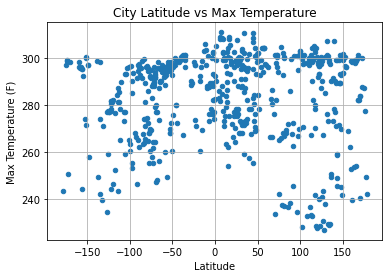

In [53]:
lat_vs_temp = pd.DataFrame()
lat_vs_temp["Lat"] = clean_city_data["Lat"] 
lat_vs_temp["Max Temp"] = clean_city_data["Max Temp"]
lat_vs_temp.plot.scatter(x="Lat",y="Max Temp")
plt.title("City Latitude vs Max Temperature")
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid()
plt.show()

### Latitude vs Humidity